### **HW3 Part 2: Due Date: Friday, April 23, 5PM PDT, on Gradescope.**


# Submission instructions

1. Copy this notebook into your own Google drive with its original name (for example, you can copy this notebook to a folder named `ECE180` that you create in your Google Drive).
2. Work on your own copy and after you are done, make sure all your code has executed and output of the code (if any) is visible below each code block for full credit. You are given skeleton code for Problem 1 and 2 below.
3. To submit to gradescope, download this notebook as a pdf (using `nbconvert` - instructions mentioned below and summarized in point 4, 5 here) after executing all code blocks and rename the pdf to ECE180-S21-HW3-part2-FirstName-LastName-PermNumber.pdf and then submit. **Note**: **When submitting your pdf to gradescope, please indicate the pages where your answers are located.**
4. Note: the default location for Google drive after you mount it (see below for how to mounting) `/content/drive/MyDrive`.
5. Say that the location of this notebook on your google drive is in a folder `ECE180`. Then, the full path for the notebook in Google Colab with its original name would be: `/content/drive/MyDrive/ECE180/ECE180-S21-HW3-part2.ipynb`. Towards the end of this notebook, you will see the command to convert this notebook to pdf, which would be saved as /content/drive/MyDrive/ECE180/ECE180-S21-HW3-part2.pdf. This is the pdf you will rename (point 3) and submit.

# Preliminary steps:
1.   Run code below to mount the Google drive (in some cases, you may need to enter the authorization code for this after following the link that might show). Note: you can view the contents of Google Drive in Google Colab in the left panel after mounting it (you might need to refresh the folders to see). The location for Google Drive after you mount it is `/content/drive/MyDrive`.

In [ ]:
## might need to enter authorization code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



2.   Next, let us install the dependencies you will need to convert this notebook to pdf (point 3 of submission instructions) using `nbconvert` utility for submission to Gradescope. To install `nbconvert`, run the following commands - make sure they complete without any errors - seek help on the Gauchospace forums or from TAs if you encounter errors. 
Watch out for a prompt to press ENTER - you have to respond by clicking below the prompt to reveal a text box and then press enter.
NOTE: in order to reduce the size of this notebook, the output of the following code cell can be deleted (by clicking the 'x' icon that shows up in the top left of the cell output, before saving this notebook as a pdf).

3. Restart runtime to load newly-installed libraries (Runtine --> Restart runtime)

# Linear Regression using Gradient Descent

In this programming exercise, you will implement linear regression using gradient descent (without deep learning libraries such as Tensorflow or Pytorch).
You will submit this part of HW3 through a Google Colab notebook. This notebook provides a skeleton of how to organize your code adn responses to the questions asked. **Report all your answers to the questions below in your copy of this notebook and submit your copy as a separate pdf on Gradescope.**


**Dataset.** You will be using the housing dataset for this task. The input data is a 2-dimensional feature vector containing square feet and number of bedrooms and the expected output is the house price.
This housing dataset is located in the file: housing\_prices.txt in the HW3 folder in Gauchospace or it can also be found here: https://drive.google.com/file/d/1fFhs_7axS56NOyFEY-KWjmX3Zh5rzRLs/view?usp=sharing.
Each row in housing\_prices.txt contains the square footage, number of bedrooms and selling price separated by commas.

**Model.** The linear regression model we want to train is: $y = m1\cdot x1 + m2\cdot x2 + m0$. Here, $y$ is the housing price, $x1$ is the square footage, $x2$ is the number of bedrooms. The parameters of the model are $m1,m2,m0$.

**Train / Test split.** Choose the last 10 rows as your testing set and do NOT train on these samples.

Respond to each of the questionS (a) through (f) below.

**(a) Visualize your data.**

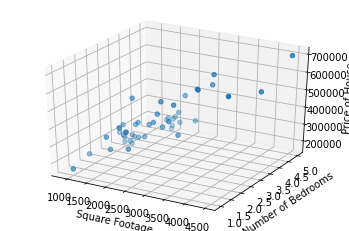

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
## visualization code here

## Insert your code here
# Load the dataset
temp = []
with open("/content/drive/MyDrive/ECE180/housing_prices.txt", "r") as file:
  for line in file:
    row = line.split(",")
    row[2] = row[2].rstrip("\n")
    temp.append(list(map(int, row)))

data = np.array(temp)
# Plot your data
# Refer to this material on how to generate 3d plots using matplotlib: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# Don't forget to separate part of the data to be used only for testing
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(data[:,0], data[:,1], data[:,2]);

ax.set_xlabel('Square Footage')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price of House')

plt.show()


In [ ]:
num_rows = data.shape[0]
train_data = data[0:num_rows-10,:]
test_data = data[num_rows-10:num_rows,:]

**(b) Using mean-squared error as the loss function, derive the update rule for parameters. Mention the update rule in your report.**

*Your answer here:*


*   Take derivative of mean-square with respect to each updated weight (m0, m1, m2)
*   Multiply result by the learning rate, then subtract this result from the weights







**(c) Using the update rule, implement and train the linear regression model. You can train the model for $10$ epochs, with a learning rate of $10^{-7}$. Show the plot of the average train and test loss as a function of the number of epochs (you can use one plot for both train and test, use a different line style and specify a legend).**

In [ ]:

# Using the update rule you derived, train the linear regression model, show the code and final plot
#square footage
X_1 = train_data[:,0]
#no. bedrooms
X_2 = train_data[:,1]
#price (label)
y = train_data[:,2]



In [ ]:
def train_model1(X_1, X_2, y, m0, m1, m2, l_rate, epochs,n):
  train_loss = []
  test_loss = []
  for i in range(epochs):
    #train equation
    y_pred = m1*X_1 + m2*X_2 + m0
    #derivative w/ resp m1, m2, m0 (weights)
    d_m0 = (-2/n) * sum(y - y_pred)
    d_m1 = (-2/n) * sum(X_1 * (y - y_pred))
    d_m2 = (-2/n) * sum(X_2 * (y - y_pred))
    #multiply by learning rate then subtract by respective weight
    m0 -= l_rate * d_m0
    m1 -= l_rate * d_m1
    m2 -= l_rate * d_m2

    #loss = sum (y - (m1*x1 + m2*x2 + m0)**2)/ total rows
    #train loss
    train_loss.append(sum((y - (m1*X_1 + m2*X_2 + m0))**2)/n)

    #test loss
    test_loss.append(sum((test_data[:,2] - (m1*test_data[:,0] + m2*test_data[:,1] + m0))**2)/n)

  plt.plot(train_loss, label = 'Train Loss')
  plt.plot(test_loss, label='Test Loss')
  plt.title('Train vs. Test Loss w/ Gradient Descent: Learning Rate = ' + str(l_rate), y = 1.10)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='upper right')
  plt.show()

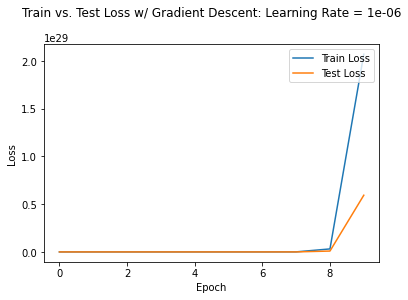

In [ ]:
#initialized all weights to 0
train_model1(X_1, X_2, y, 0, 0, 0, 10E-7, 10, train_data.shape[0])

**(d) Data Normalization: When input data or features differ by orders of magnitude, first performing feature scaling will give better results. Lets define the data normalization as follows:**
1.   **Subtract the mean value of each feature from the dataset,**
2.   **Divide the features obtained from (i) by their respective standard deviations.**

**What are the results of training with normalized data and a learning rate of $0.1$. Show the plot of the average train and test loss as a function of the number of epochs (plot train and test on a single plot as done in (c)).**


In [ ]:

# Next, let's explore the effect of normalizing the data before training
# For this step, calculate the mean and standard deviation of each feature
# Then, subtract the mean from the feature values and divide by the standard deviation
x1_train = (X_1 - np.mean(X_1))/np.std(X_1)
x2_train = (X_2 - np.mean(X_2))/np.std(X_2)
x1_test = (test_data[:,0]-np.mean(test_data[:,0]))/np.std(test_data[:,0])
x2_test = (test_data[:,1]-np.mean(test_data[:,1]))/np.std(test_data[:,1])
# Train your model again using the normalized data
# You can define your training code on a function so that you can reuse it for this step



In [ ]:
def train_model2(x1_train, x2_train, x1_test, x2_test, y, m0, m1, m2, l_rate, epochs,n):
  train_loss = []
  test_loss = []
  for i in range(epochs):
    #train equation
    y_pred = m1*x1_train + m2*x2_train + m0
    #derivative w/ resp m1, m2, m0 (weights)
    d_m0 = (-2/n) * sum(y - y_pred)
    d_m1 = (-2/n) * sum(x1_train * (y - y_pred))
    d_m2 = (-2/n) * sum(x2_train * (y - y_pred))
    #multiply by learning rate then subtract by respective weight
    m0 -= l_rate * d_m0
    m1 -= l_rate * d_m1
    m2 -= l_rate * d_m2

    #loss = sum (y - (m1*x1 + m2*x2 + m0)**2)/ total rows
    #train loss
    train_loss.append(sum((y - (m1*x1_train + m2*x2_train + m0))**2)/n)

    #test loss
    test_loss.append(sum((test_data[:,2] - (m1*x1_test + m2*x2_test + m0))**2)/n)

  plt.plot(train_loss, label = 'Train Loss')
  plt.plot(test_loss, label='Test Loss')
  plt.title('Train vs. Test Loss w/ Normalized Gradient Descent: Learning Rate = ' + str(l_rate), y = 1.08)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='upper right')
  plt.show()

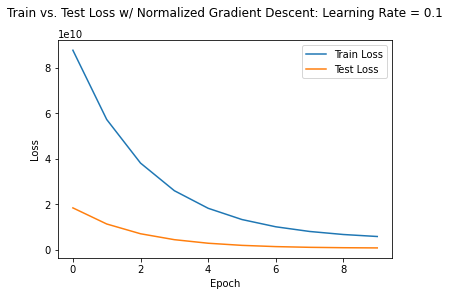

In [ ]:
#initialize weights to 0
train_model2(x1_train, x2_train, x1_test, x2_test, y, 0, 0, 0, 0.1, 10, train_data.shape[0])

**(e) Compare the results of with-normalization against without-normalization and Comment on them.**


Based on the plot figures for the non-normalized and normalized models (model1 vs model2), the train and test losses decrease dramatically for the normalized model (model2) in comparison to the train and test losses in the non-normalized model (model1). The feature scaling in the normalized model allowed for a consistent update in weights that lead to lower loss values towards the 10th epoch. However, in the non-normalized model, since there wasn't any feature scaling performed on the data, the loss value instead rose near the 10th epoch. From this data, it can be implied that feature scaling through normalization of features provides better results when observing a steady decline in loss value for both training and test data. 

**(f) Train the model using different learning rate values: $0.01,0.05,0.1,5,10$ WITH data normalization. For each learning rate, show the plot of the average train and test loss as a function of the number of epochs (plot train and test on a single plot as done in (c)).**

In [ ]:
## code to train with 5 different learning rates.

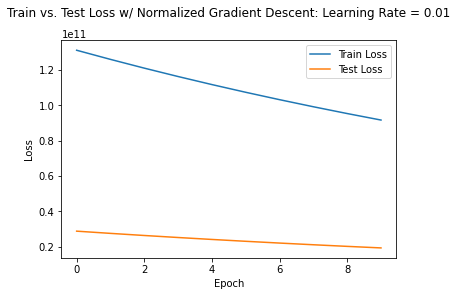

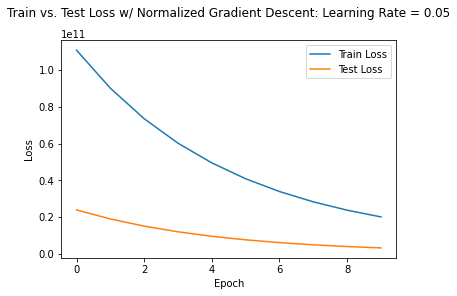

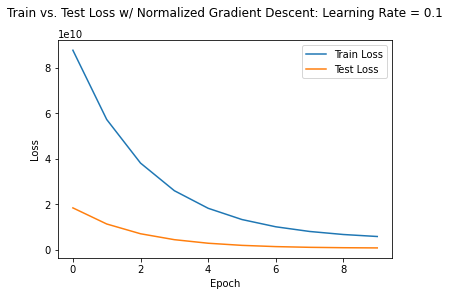

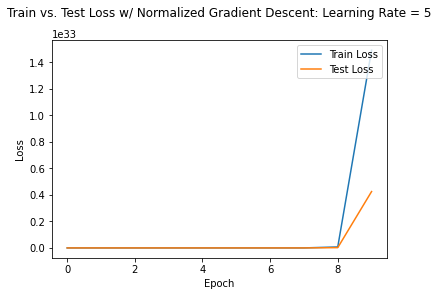

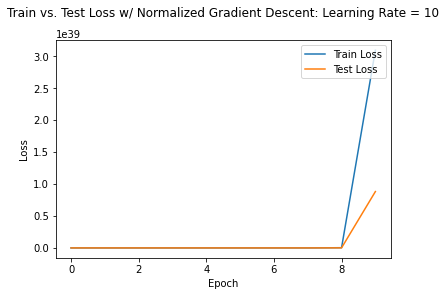

In [ ]:
#learning rate = 0.01
train_model2(x1_train, x2_train, x1_test, x2_test, y, 0, 0, 0, 0.01, 10, train_data.shape[0])

#learning rate = 0.05
train_model2(x1_train, x2_train, x1_test, x2_test, y, 0, 0, 0, 0.05, 10, train_data.shape[0])

#learning rate = 0.1
train_model2(x1_train, x2_train, x1_test, x2_test, y, 0, 0, 0, 0.1, 10, train_data.shape[0])

#learning rate = 5
train_model2(x1_train, x2_train, x1_test, x2_test, y, 0, 0, 0, 5, 10, train_data.shape[0])

#learning rate = 10
train_model2(x1_train, x2_train, x1_test, x2_test, y, 0, 0, 0, 10, 10, train_data.shape[0])

---
# Save out the notebook
If you saved this notebook into the folder `ECE180` in google drive with original name, then run the following command (otherwise, adjust the path to the notebook and its name according to how you saved it). The saved out PDF will show up in the same directory as your copy of this notebook. Rename the pdf as mentioned in submission instructions and submit it to gradescope. The conversion will not work correctly if preliminary step 2 and 3 were not completed without errors. Be sure to check that the converted pdf in your Google Drive is fully rendered with all your responses.

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/ECE180/ECE180-S21-HW3-part2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ECE180/ECE180-S21-HW3-part2.ipynb to PDF
[NbConvertApp] Support files will be in ECE180-S21-HW3-part2_files/
[NbConvertApp] Making directory ./ECE180-S21-HW3-part2_files
[NbConvertApp] Making directory ./ECE180-S21-HW3-part2_files
[NbConvertApp] Making directory ./ECE180-S21-HW3-part2_files
[NbConvertApp] Making directory ./ECE180-S21-HW3-part2_files
[NbConvertApp] Making directory ./ECE180-S21-HW3-part2_files
[NbConvertApp] Making directory ./ECE180-S21-HW3-part2_files
[NbConvertApp] Making directory ./ECE180-S21-HW3-part2_files
[NbConvertApp] Making directory ./ECE180-S21-HW3-part2_files
[NbConvertApp] Writing 67303 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully creat